## ML Practice

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Sample Data
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.2)

In [3]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Training
svm = SVC(kernel='linear', C=1.0)  # Using a linear kernel
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [5]:
#Make predictions
y_pred = svm.predict(X_test)

In [6]:
#Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[14  0]
 [ 0 16]]


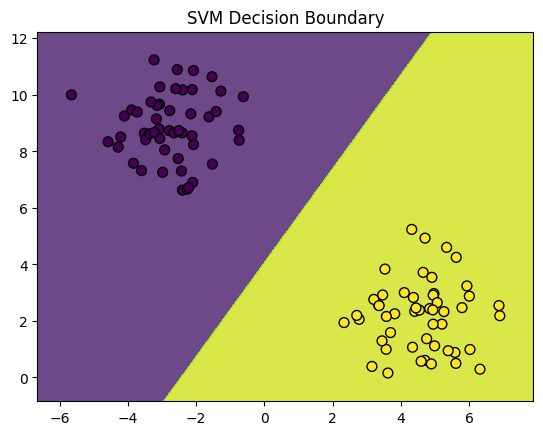

In [7]:
#Visualization
def plot_decision_boundary(X, y, model):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
    plt.title("SVM Decision Boundary")
    plt.show()

plot_decision_boundary(X, y, svm)


In [8]:
# Predict
new_points = np.array([[2, 3], [6, -2], [0, 0]])


predictions = svm.predict(new_points)
print("Predictions for new points:", predictions)

Predictions for new points: [1 1 1]


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  


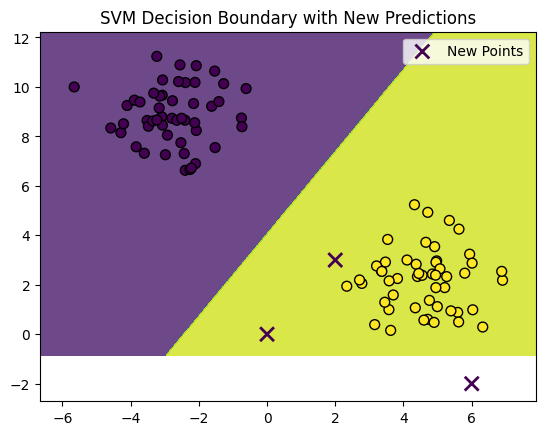

In [9]:
def plot_with_predictions(X, y, model, new_points, predictions):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
    
    
    plt.scatter(new_points[:, 0], new_points[:, 1], c=predictions, 
                edgecolors='w', marker='x', s=100, linewidth=2, label='New Points')
    
    plt.title("SVM Decision Boundary with New Predictions")
    plt.legend()
    plt.show()

    
plot_with_predictions(X, y, svm, new_points, predictions)

### Real Life DataSet Example:

In [24]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
df = pd.read_csv(url, sep=';')
df['quality_label'] = np.where(df['quality'] >= 7, 1, 0)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [25]:
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [28]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [29]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [31]:
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train_scaled, y_train_resampled)

SVC(random_state=42)

In [32]:
y_pred = svm.predict(X_test_scaled)

In [33]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Bad', 'Good']))


Classification Report:
              precision    recall  f1-score   support

         Bad       0.93      0.77      0.85      1152
        Good       0.49      0.80      0.61       318

    accuracy                           0.78      1470
   macro avg       0.71      0.79      0.73      1470
weighted avg       0.84      0.78      0.80      1470



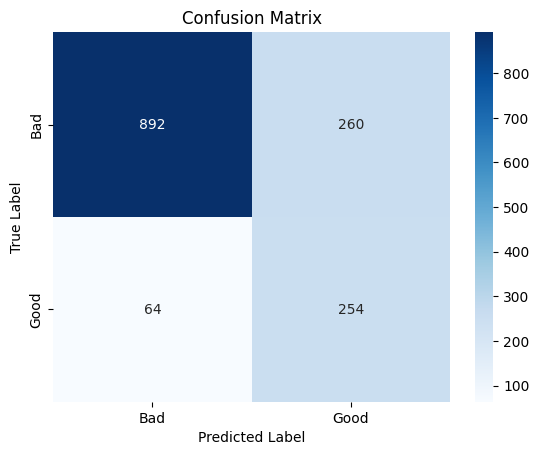

In [34]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [37]:
new_good_wine = np.array([[7.5, 0.28, 0.34, 15.2, 0.040, 40.0, 150.0, 0.998, 3.2, 0.50, 12.5]]) #Good Wine
new_bad_wine = np.array([[6.0, 0.35, 0.28, 30.5, 0.050, 60.0, 200.0, 1.002, 3.4, 0.60, 9.0]]) #Bad Wine

new_wines = np.vstack([new_good_wine, new_bad_wine])

new_wines_scaled = scaler.transform(new_wines)

predictions = svm.predict(new_wines_scaled)

for i, prediction in enumerate(predictions):
    wine_type = "Good" if prediction == 1 else "Bad"
    print(f"The wine {i+1} is predicted to be: {wine_type}")


The wine 1 is predicted to be: Good
The wine 2 is predicted to be: Bad


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
